# Time Series Analysis - Predict Traffic on a New Mode of Transport.

In [1]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series        
%matplotlib inline
import warnings                  
warnings.filterwarnings("ignore")

Read the training and test data

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
trainO=train.copy()
testO=test.copy()

Looking at the features in the train and test dataset

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

- ID is the unique number given to each observation point.
- Datetime is the time of each observation.
- Count is the passenger count corresponding to each Datetime.

In [5]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [6]:
train.Datetime[1]

'25-08-2012 01:00'

Change the data type of Datetime column to date and time format 

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
testO['Datetime'] = pd.to_datetime(testO.Datetime,format='%d-%m-%Y %H:%M')
trainO['Datetime'] = pd.to_datetime(trainO.Datetime,format='%d-%m-%Y %H:%M')

Extract the year, month, day and hour from the Datetime variable

In [8]:
for i in (train, test, testO, trainO):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [9]:
train

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
5,5,2012-08-25 05:00:00,2,2012,8,25,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6
7,7,2012-08-25 07:00:00,2,2012,8,25,7
8,8,2012-08-25 08:00:00,6,2012,8,25,8
9,9,2012-08-25 09:00:00,2,2012,8,25,9


Let us make a weekend variable to visualize the impact of traffic on a weekday versus weekend.
Values of 5 and 6 represents a weekend day.
So lets extract day of the week from Datetime variable

In [10]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']
#assign 1 if the day of week is a weekend and 0 if not a weekend

In [11]:
def Marker(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(Marker)
train['weekend']=temp2

Before We get started with the analysis, lets visualize the time series.

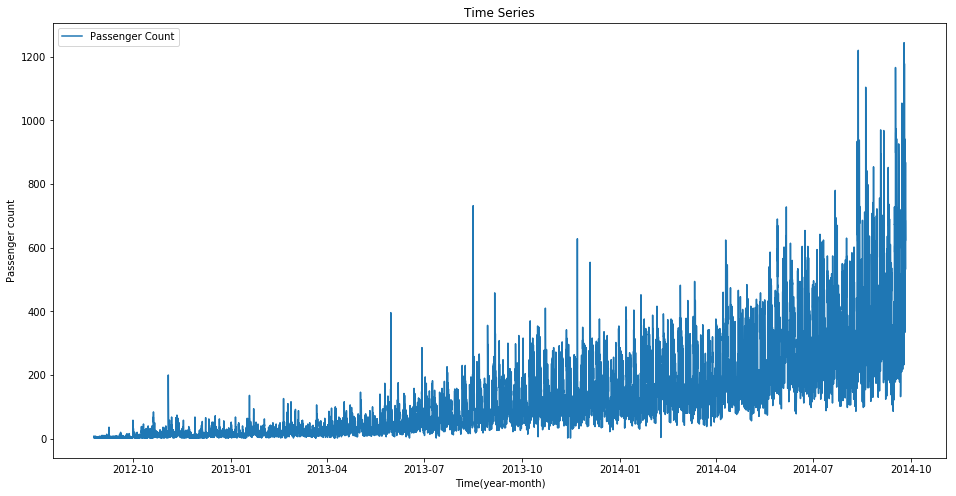

In [12]:
train.index = train['Datetime']
df=train.drop('ID',1)         
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

### Exploratory Analysis

Logical hypothesis for traffic data:
- Traffic will increase as the years pass by (population increase overtime)
- Traffic will be high from May to October (Tourist influx)
- Traffic on weekdays will be more 
- Traffic during the peak hours will be high

Let us try to verify our hypothesis using the actual data.

#### 1st Hypothesis

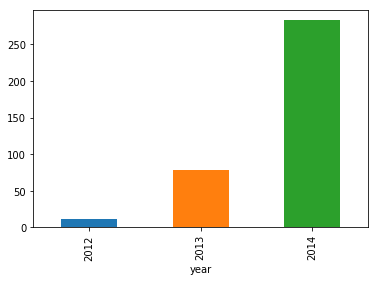

In [13]:
train.groupby('year')['Count'].mean().plot.bar()

#### 2nd hypothesis

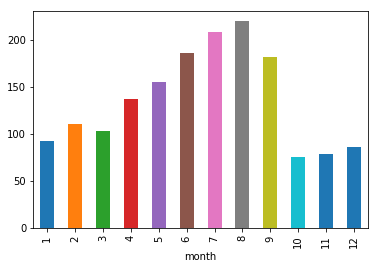

In [14]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

([<matplotlib.axis.XTick at 0x17950b909b0>,
 <a list of 6 Text xticklabel objects>)

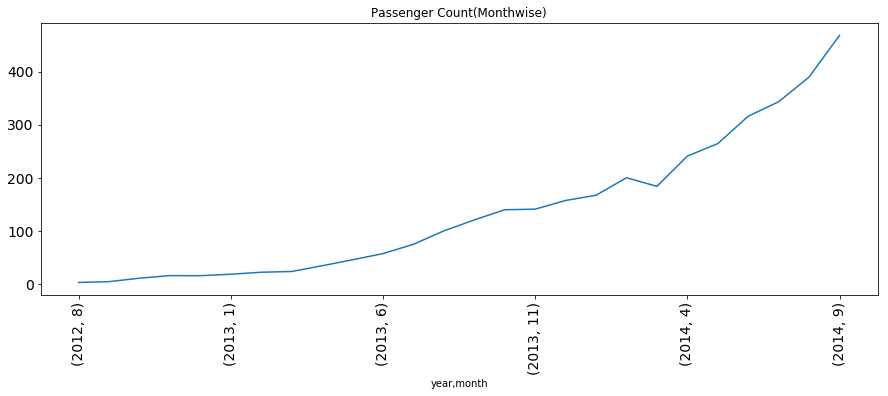

In [15]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)
plt.xticks(range(0,30,5),temp.index[0::5], rotation =90)

We see that the months 10, 11 and 12 are not present for the year 2014. This explains why the mean of the passenger count for the last 3 months is low in Figure 2 above.

Now let's explore the daily mean of passenger count

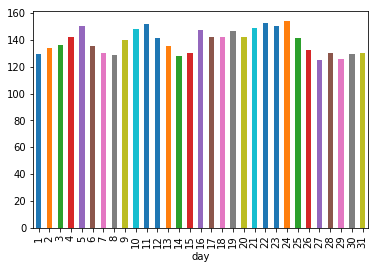

In [16]:
train.groupby('day')['Count'].mean().plot.bar()

There isn't much to learn from this plot

#### 3rd hypothesis -  traffic will be more during peak hour

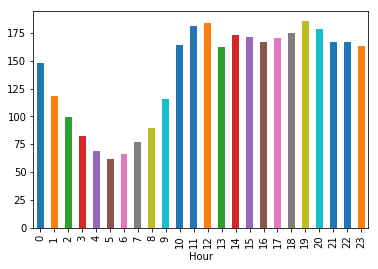

In [17]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be deduced that 5pm-7pm is the most crowded time of the day from the above figure. However, this figure also provides unexpected insight about the increase of passenger count around 1-2am. This can be due to the influx of weekend party crowd going home.

#### 4th hypothesis - traffic will be more on weekdays.

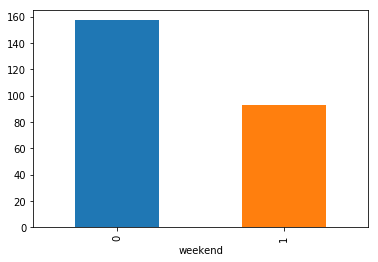

In [18]:
train.groupby('weekend')['Count'].mean().plot.bar()

As expected traffic is higher by 50% during weekdays.

Out of curiosity let's also look at the passenger count per day.

**Note** - 0 is Monday and 6 is Sunday.

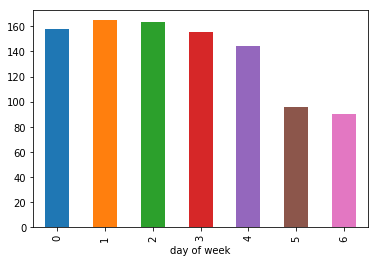

In [19]:
train.groupby('day of week')['Count'].mean().plot.bar()

# Basic Modeling

As shown there is a lot of noise in the hourly time series, so I will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

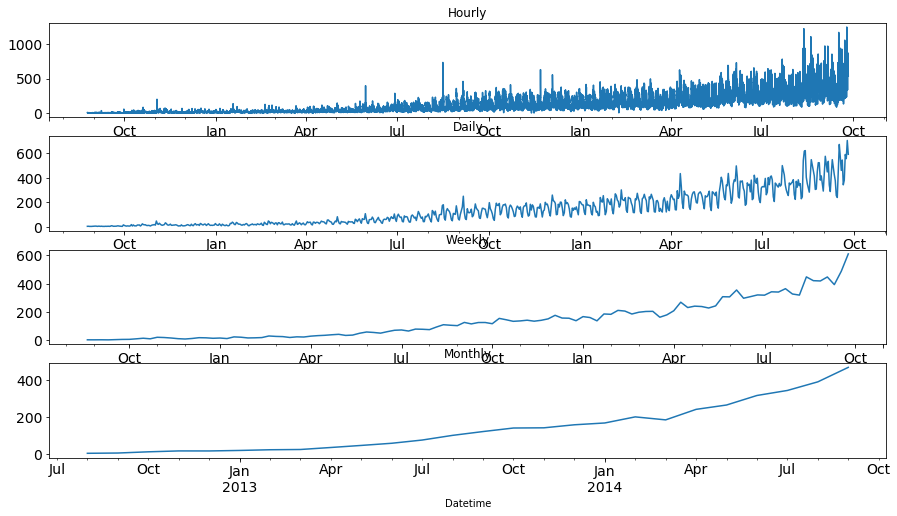

In [20]:
train=train.drop('ID',1) # as the ID variable has nothing to do with the passenger count.
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

# Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

It can be seen that the time series is becoming more and more stable when aggregated on a daily, weekly and monthly basis.
But it would be difficult to convert the monthly and weekly predictions to hourly predictions which will become very expanded process. So, let's work on the daily time series.

In [21]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

## Splitting the data into training and validation part

Let's take the last 3 months as the validation data and rest for training. If one takes more than 3 months for the validation set, the training set will have less data points as the total duration is 26 months.

If split randomly, it may work for the training dataset but will not work effectively on the validation dataset.

In [22]:
Train=train.ix['2012-08-25':'2014-06-24']
Valid=train.ix['2014-06-25':'2014-09-25']

# Modeling and Forecasting

#### Holt’s Linear Trend Model

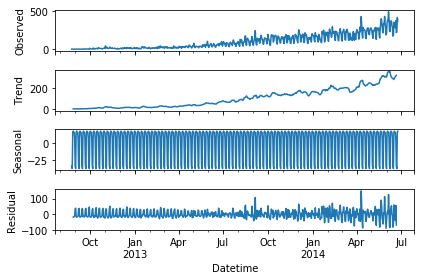

In [24]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
plt.show()

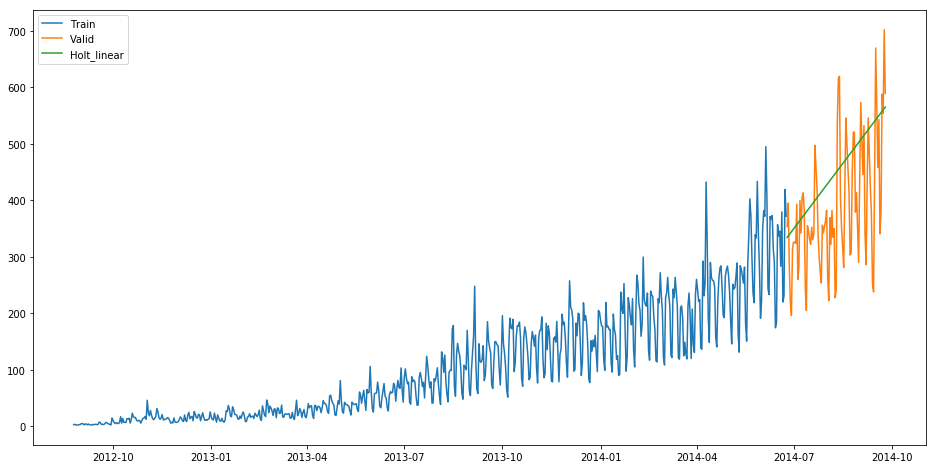

In [36]:
from statsmodels.tsa.api import Holt

y_hat_avg = Valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(Valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [37]:
# Calculate the rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.Holt_linear))
print(rms)


112.94278345314041


In [41]:
# Make predictions based on the daily time series and distribute the daily prediction to hourly predictions.

predict=fit1.forecast(len(test))
test['prediction']=predict

Convert the daily predictions to hourly

In [64]:
# Calculating the hourly ratio of count
trainO['ratio']=trainO['Count']/trainO['Count'].sum()
temp=trainO.groupby(['Hour'])['ratio'].sum()
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('Result.csv')
temp2=pd.read_csv("Result.csv")
temp2=temp2.drop('Hour.1',1)


In [72]:
merge=pd.merge(test, testO, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)
prediction=pd.merge(merge, temp2, on='Hour', how='left')
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']
S=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final Result to csv format
pd.DataFrame(S, columns=['ID','Count']).to_csv('Holt linear.csv')

#### Holt winter’s model on daily time series

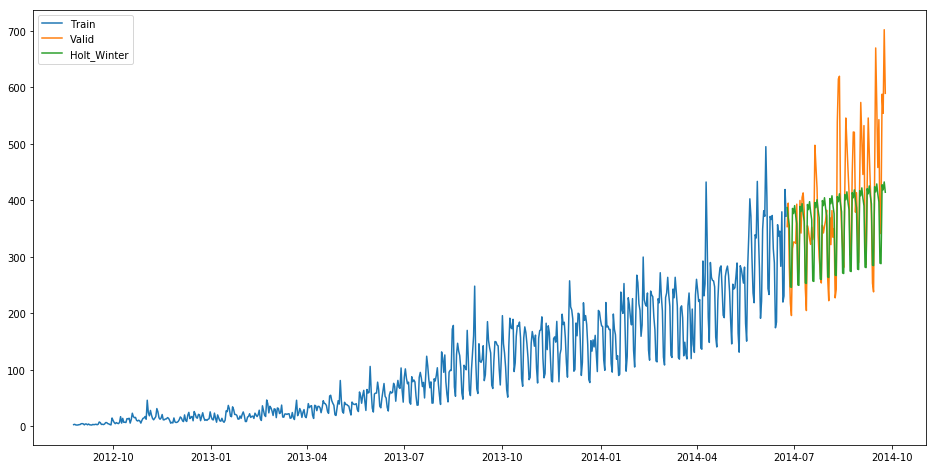

In [74]:
from statsmodels.tsa.api import ExponentialSmoothing

y_hat_avg = Valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [75]:
rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37900996094073


In [77]:
predict=fit1.forecast(len(test))
test['prediction']=predict

merge=pd.merge(test, testO, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)


prediction=pd.merge(merge, temp2, on='Hour', how='left')
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final results to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

### ARIMA Model

In [83]:
# Let's first determine Stationarity of the series using Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

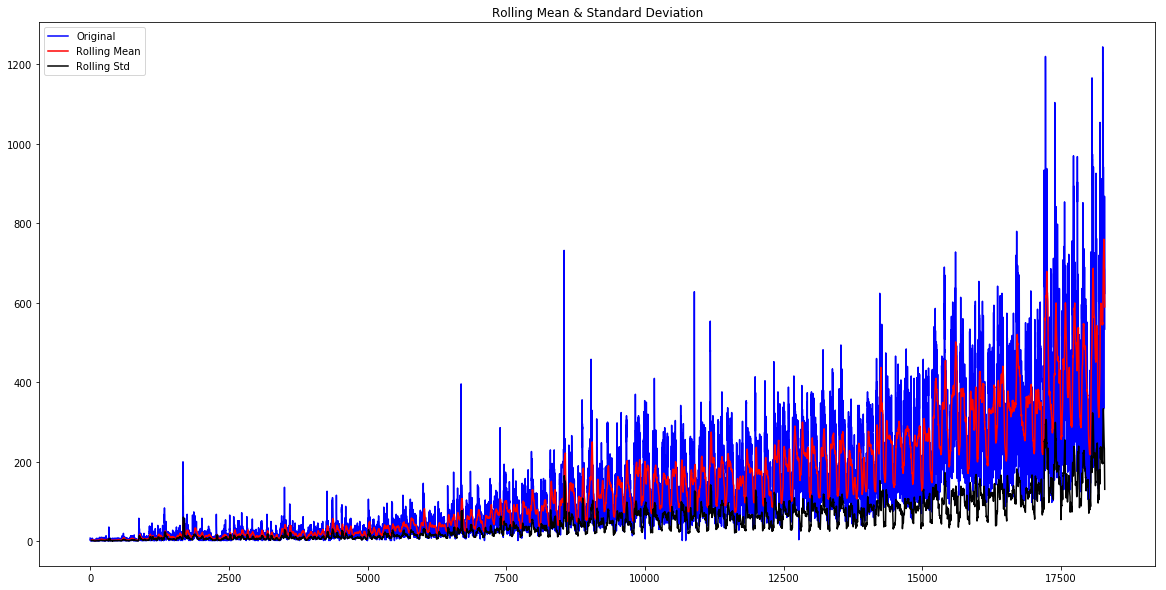

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [84]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
test_stationarity(trainO['Count'])

From the above results, it can be seen that the data isn't stationary. Therefore, we need to remove the trend and seasonality from the data.

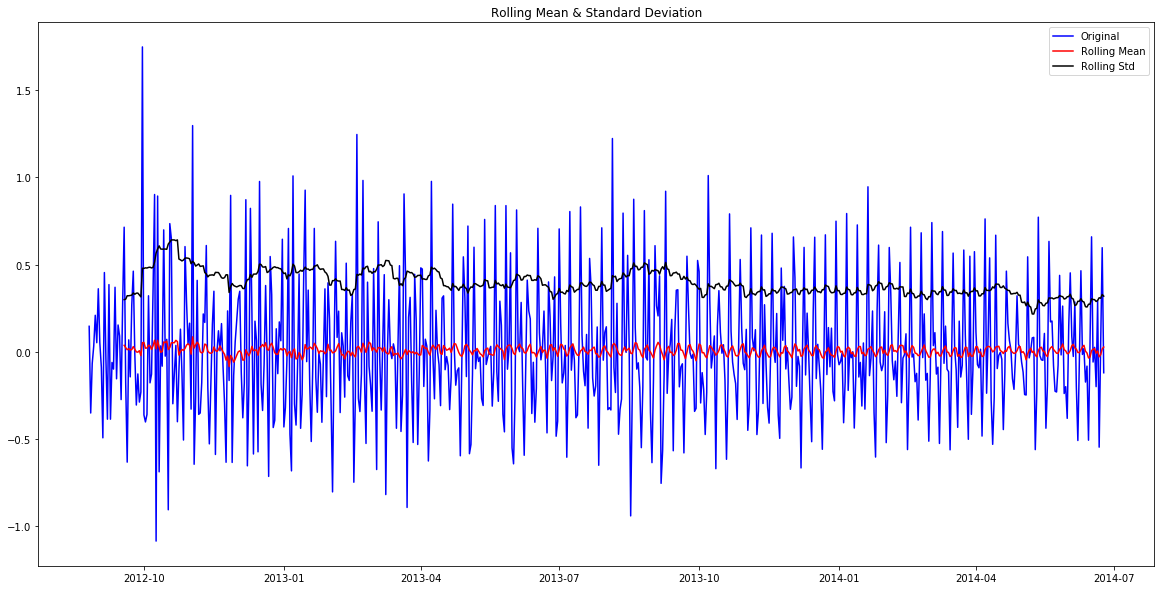

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [86]:
# Difference log transform data to make data stationary on both mean and varianceb

Train_log = np.log(Train['Count'])
valid_log = np.log(Valid['Count'])

train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

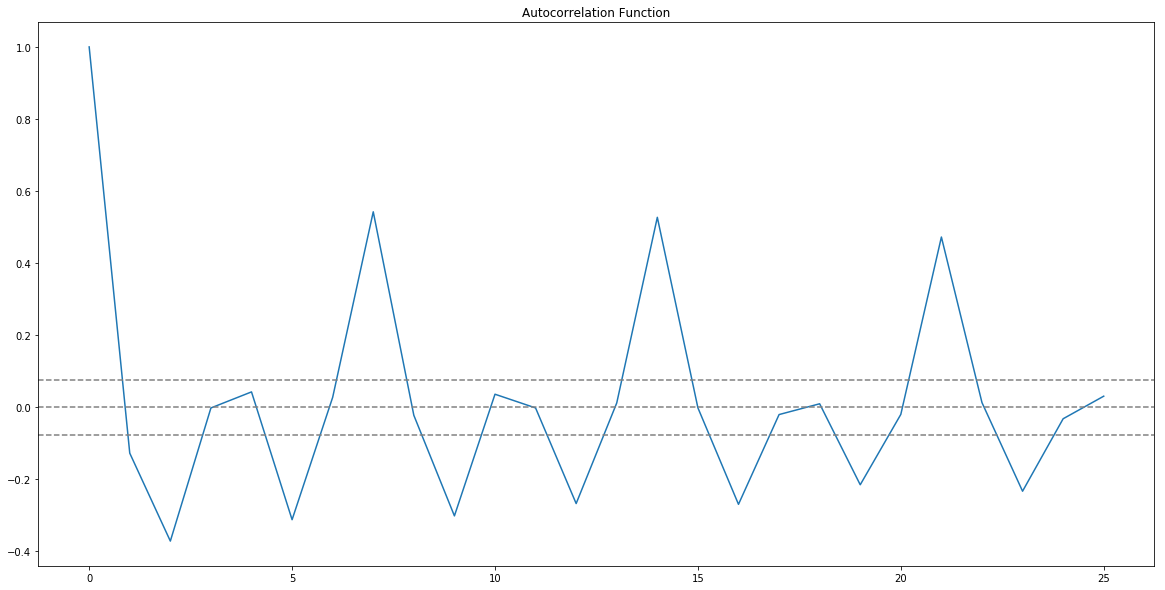

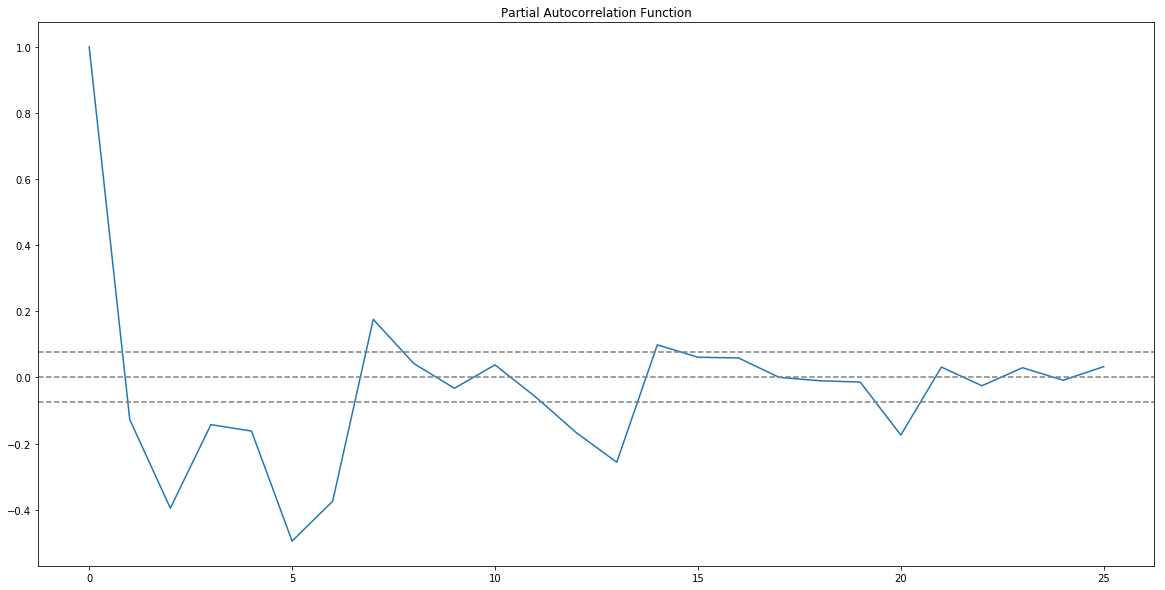

In [87]:
# ACF and PACF Plots to find out optimum p and q valuesbb

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

#### AR Model

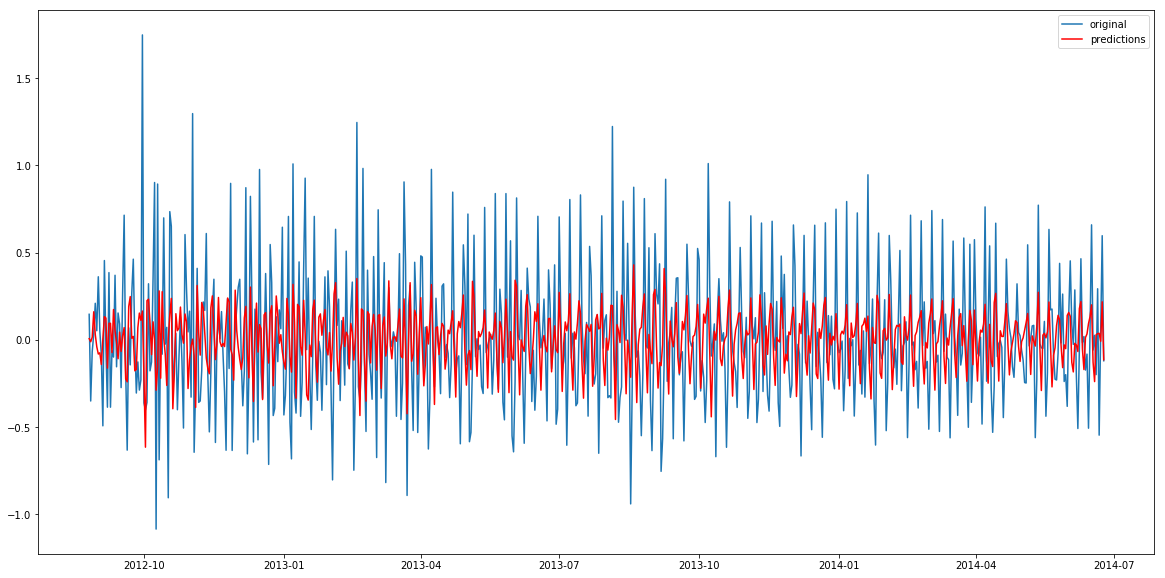

In [88]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

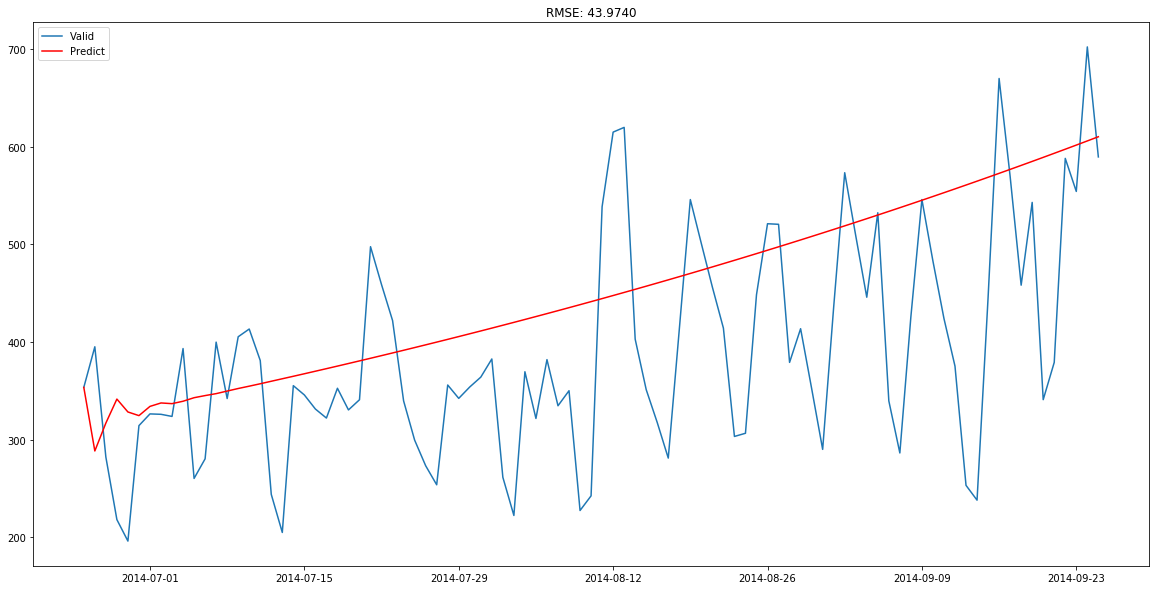

In [91]:
# Plotting the validation curve for AR model.

AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Count'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.plot(Valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Count']))/Valid.shape[0]))
plt.show()

#### MA Model

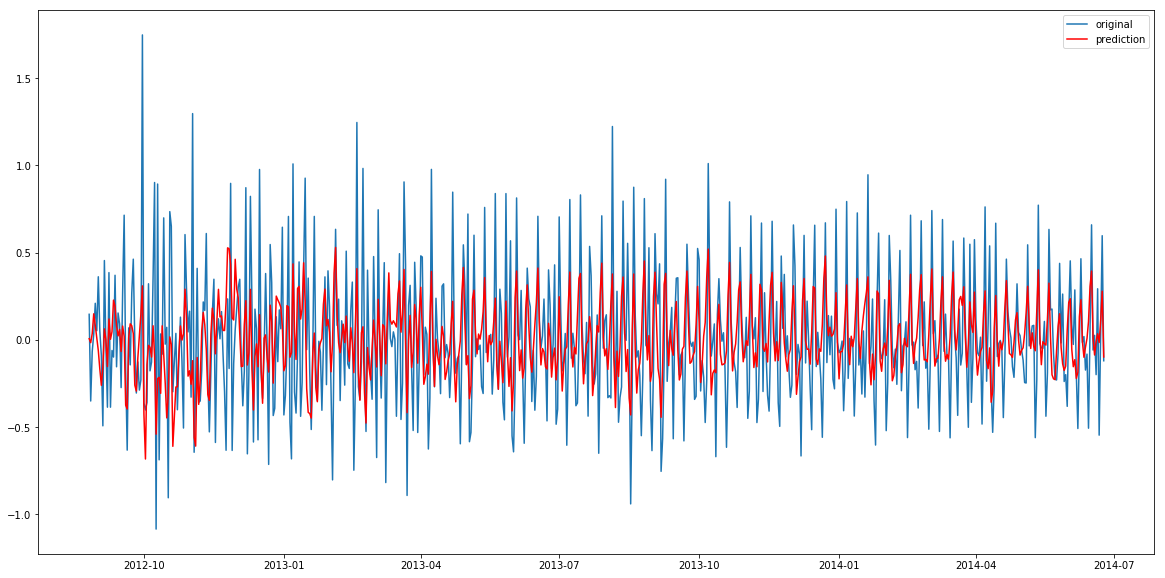

In [92]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()


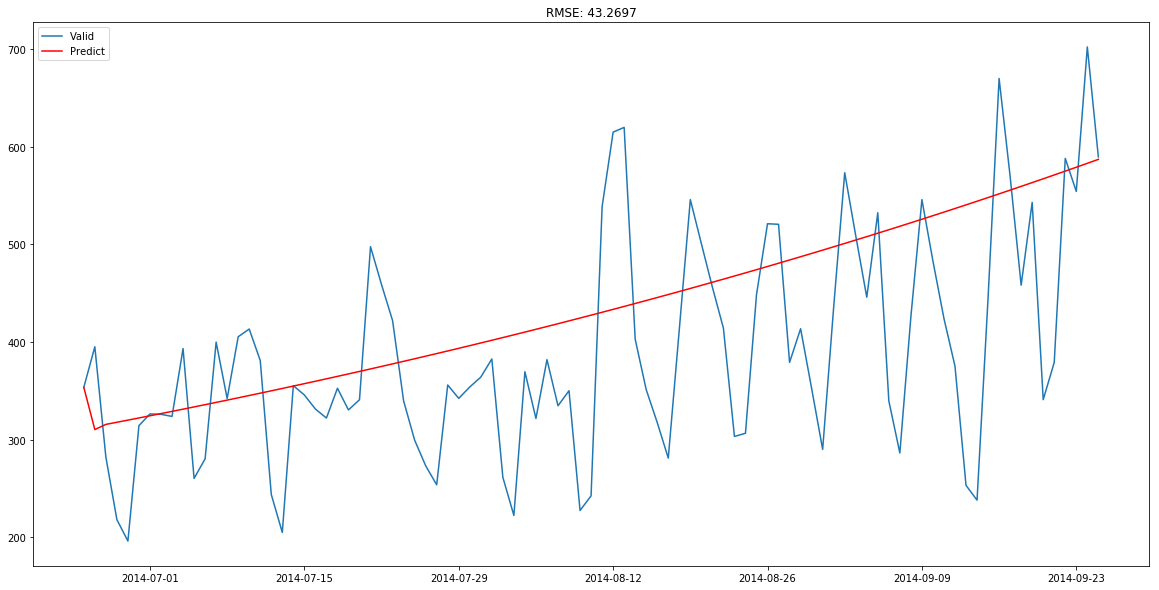

In [94]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Count'])[0], index = Valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)
plt.plot(Valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Count']))/Valid.shape[0]))
plt.show()

#### Combined Model

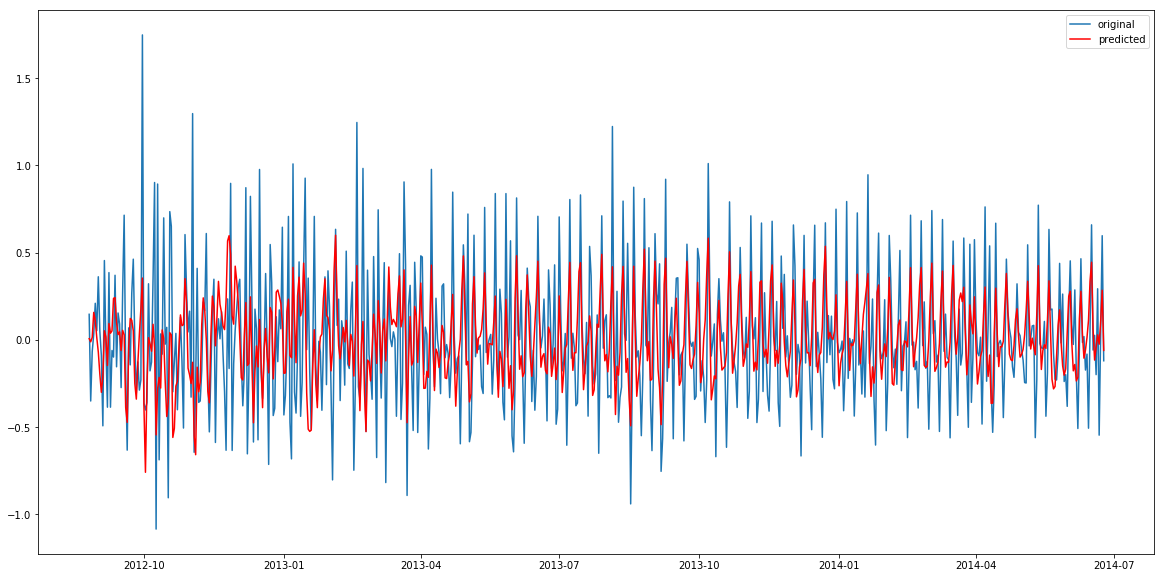

In [95]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [97]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

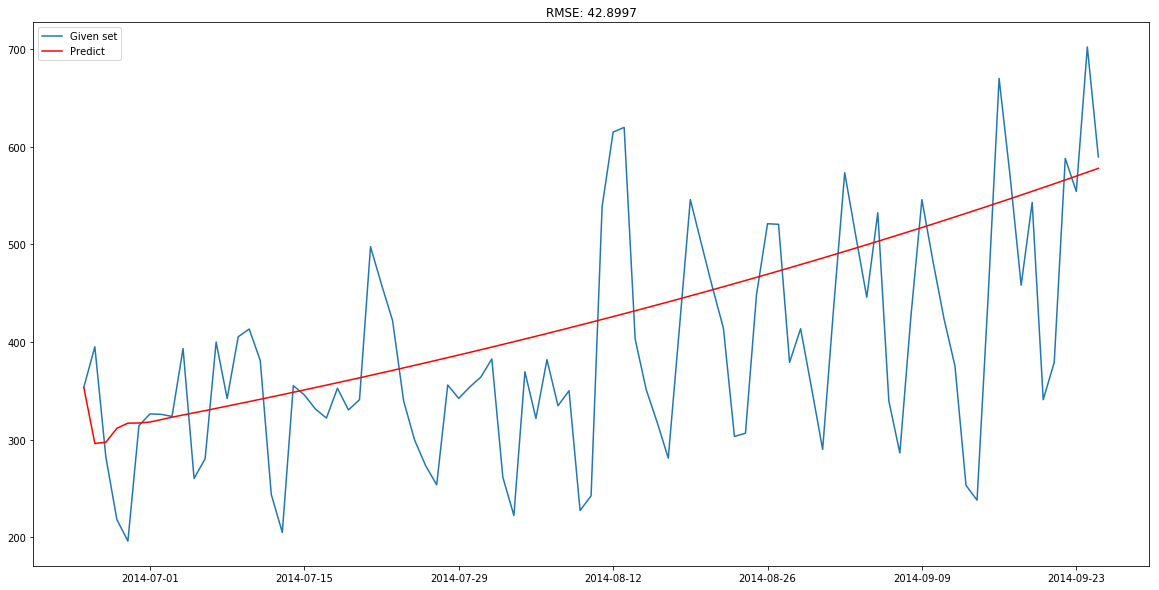

In [99]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, Valid)

## SARIMAX Model

c:\users\yohannes\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


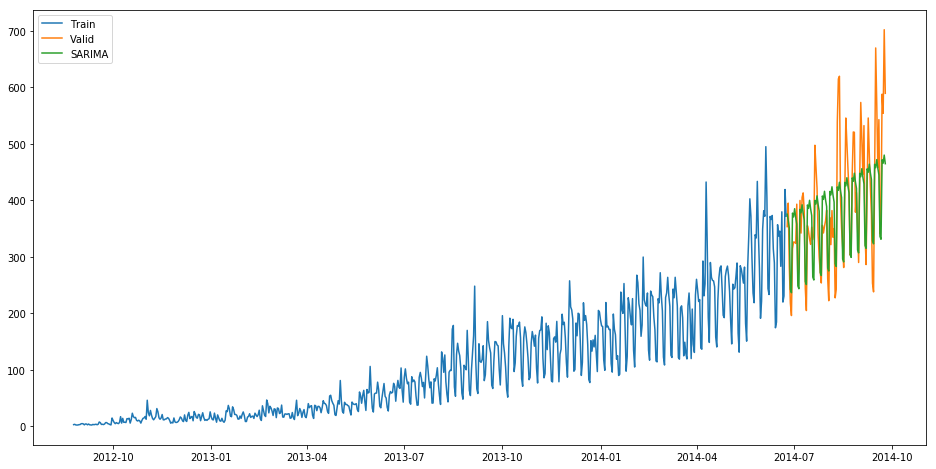

In [101]:
y_hat_avg = Valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [103]:
rms_SARIMA = sqrt(mean_squared_error(Valid.Count, y_hat_avg.SARIMA))
print(rms_SARIMA)

69.97102015184213


In [105]:
test['prediction']=predict #Forecast using Test Data

# Convert daily prediction into hourly 
merge=pd.merge(test, testO, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)
prediction=pd.merge(merge, temp2, on='Hour', how='left')
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final result to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

# SARIMAX produced the best Result out of all the Models.